# 1 - Non-uniform random numbers

##### Imports

In [263]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.integrate as integrate

##### Functions

In [264]:
def hit_and_miss(a, b, M, func):
    t = random.uniform(a, b)
    s = random.uniform(0, M)
    
    if s > func(t): #miss
        return "miss"
    else:
        return t

## 1.1 - Distribution function

$\textbf{First function:}$ uniform distribution in the interval $[-2, 1]$. The inverse of the cumulative distribution function is $F_1^{-1}(x) = 3x - 2$.

In [265]:
def f1(x):
    return 3*x - 2

In [266]:
npts = 10**5
numbers = []

for i in range(npts):
    x = random.uniform(0, 1)
    numbers.append(f1(x))

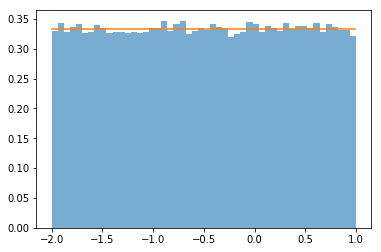

In [267]:
plt.hist(numbers, density = True, bins = 50, alpha = 0.6)
t = np.arange(-2, 1, 0.01)
y = [1/3 for element in t]
plt.plot(t, y)
plt.show()

$\textbf{Second function:}$ the inverse of the cumulative distribution function is $F_2^{-1}(x) = - \log(1-x)$. 

In [268]:
def f2(x):
    return -np.log(1-x)

In [269]:
npts = 10**5
numbers = []

for i in range(npts):
    x = random.uniform(0, 1)
    numbers.append(f2(x))

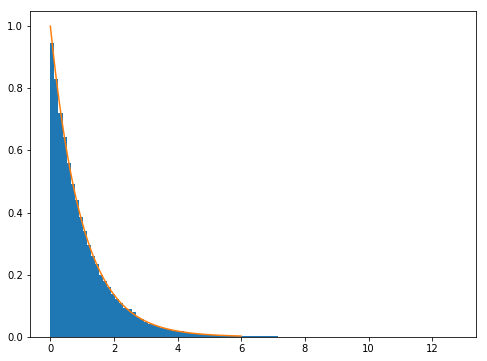

In [270]:
plt.subplots(figsize = (8, 6))
plt.hist(numbers, density = True, bins = 100)
t = np.arange(0, 6, 0.01)
y = np.exp(-t)
plt.plot(t, y)
plt.show()

$\textbf{Third function:}$ The inverse cumulative distribution function is $F_3^{-1}(x) = 2x^{1/2} - 1$.

In [271]:
def f3(x):
    return 2*x**0.5 - 1

In [272]:
npts = 10**5
numbers = []

for i in range(npts):
    x = random.uniform(0, 1)
    numbers.append(f3(x))

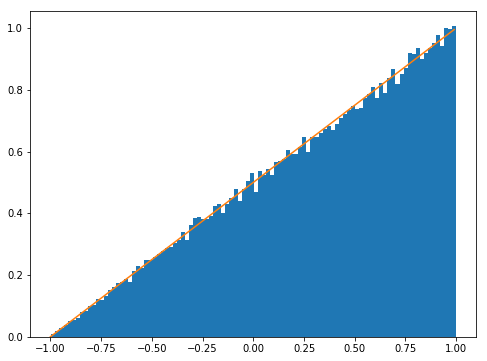

In [273]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.hist(numbers, density = True, bins = 100)
t = np.arange(-1, 1, 0.01)
y = (t+1)/2
plt.plot(t, y)
plt.show()

## 1.2 - Hit and miss method

First of all, consider the function $f(x) = \frac{x+1}{2}$ in the interval $[-1, 1]$.

In [274]:
def f(x):
    return (x+1)/2

In [293]:
# Generate the numbers
numbers_f = []
for i in range(10**6):
    value = hit_and_miss(-1, 1, 1.1, f)
    if  value != "miss":
        numbers_f.append(value)

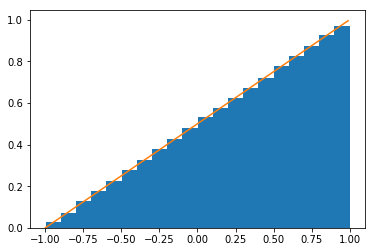

In [294]:
plt.hist(numbers_f, density = True, bins = 20)
t = np.arange(-1, 1, 0.01)
y = f(t)
plt.plot(t, y)
plt.show()

Next, we consider $g(x) = -x(1 - x)e^{-x^2}\log(1-x)$ in the interval $[0, 1]$.

Contrary to the function $f$ above, the function $g$ is not normalised to one. Therefore, we compute the integral of $g(x)$ from 0 to 1.

In [277]:
I = integrate.quad(lambda x: -x*(1-x)*np.exp(-x**2/2)*np.log(1-x), 0, 1)
I[0] # value of the integral

0.11106139250158756

We apply the hit and miss algorithm to the normalised function, which we will call $g_N(x)$.

In [278]:
def gN(x):
    return (1/I[0])*(-x*(1-x)*np.exp(-x**2/2)*np.log(1-x))

For the choice of $M$, we plot the function:

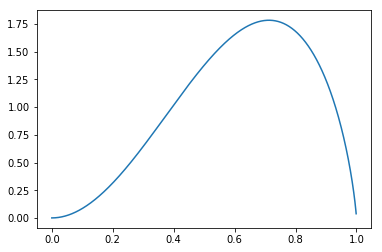

In [279]:
t = np.arange(0, 1, 0.001)
y = gN(t)
plt.plot(t, y)
plt.show()

In [280]:
numbers_g = []
for i in range(10**6):
    value = hit_and_miss(0, 1, 1.8, gN)
    if  value != "miss":
        numbers_g.append(value)

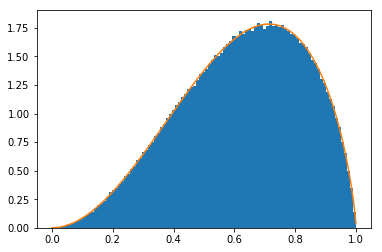

In [281]:
plt.hist(numbers_g, density = True, bins = 100)
t = np.arange(0, 1, 0.001)
y = gN(t)
plt.plot(t, y)
plt.show()

### 1.3 - 2D hit and miss

In [282]:
def hit_and_miss2D(a1, b1, a2, b2, M, func):
    t1 = random.uniform(a1, b1)
    t2 = random.uniform(a2, b2)
    s   = random.uniform(0, M)
    
    if func(t1, t2) >= 1: #miss
        return "miss"
    else:
        return (t1, t2)

In [283]:
def mag(t1, t2):
    return np.sqrt(t1**2 + t2**2)

In [284]:
numbers_2D = []
for i in range(10**5):
    value = hit_and_miss2D(-1, 1, -1, 1, 1, mag)
    if  value != "miss":
        numbers_2D.append(value)

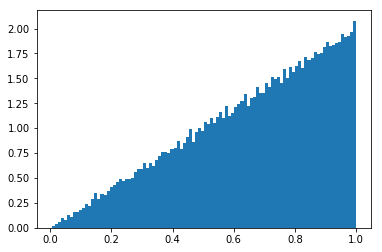

In [285]:
magnitudes = [mag(v[0], v[1]) for v in numbers_2D]

plt.hist(magnitudes, density = True, bins = 100)
plt.show()

In [286]:
xdata = [v[0] for v in numbers_2D]
ydata = [v[1] for v in numbers_2D]

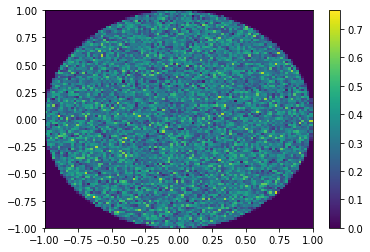

In [287]:
plt.hist2d(xdata, ydata, bins = 100, normed = True)
plt.colorbar()
plt.show()

#### 1.4 - Without the hit and miss

In [288]:
def generate():
    r = np.sqrt(random.uniform(0, 1))

    theta = random.uniform(0, 2*np.pi)
    return (r*np.cos(theta), r*np.sin(theta))

In [289]:
nstep = 10**6
xdata = []
ydata = []

for i in range(nstep):
    point = generate()
    xdata.append(point[0]); ydata.append(point[1])
    

In [290]:
np.mean(distances)

0.6669235651498057

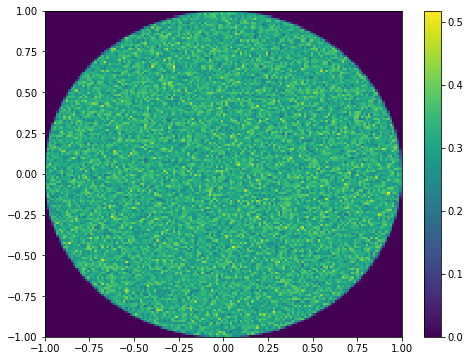

In [291]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.hist2d(xdata, ydata, bins = 150, normed = True)
plt.colorbar()
plt.show()

thanks to: http://www.anderswallin.net/2009/05/uniform-random-points-in-a-circle-using-polar-coordinates/

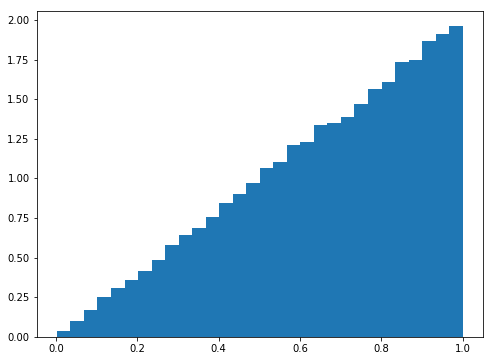

In [292]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.hist(distances, density = True, bins = 30)
plt.show()